#### Step 1: Calculate the annual spend for all the parts by multiplying the unit cost with the annual unit demand
#### Step 2: Sort inventory in decreasing order of annual spend
#### Step 3: Calculate the cumulative annual spend and the percent spend
#### Step 4: Divide the inventory into classes
#### Step 5: Analyze the classes and make appropriate decisions

In [7]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

data= pd.read_csv("Sales_analysis.csv")

print(data.describe())
print(data.columns)

               Order    SKU_number      SoldFlag  ...      ItemCount   LowUserPrice    LowNetPrice
count  198917.000000  1.989170e+05  75996.000000  ...  198917.000000  198917.000000  198917.000000
mean   106483.543242  8.613626e+05      0.171009  ...      41.426283      30.982487      46.832053
std     60136.716784  8.699794e+05      0.376519  ...      37.541215      69.066155     128.513236
min         2.000000  5.000100e+04      0.000000  ...       0.000000       0.000000       0.000000
25%     55665.000000  2.172520e+05      0.000000  ...      21.000000       4.910000      17.950000
50%    108569.000000  6.122080e+05      0.000000  ...      32.000000      16.080000      33.980000
75%    158298.000000  9.047510e+05      0.000000  ...      50.000000      40.240000      55.490000
max    208027.000000  3.960788e+06      1.000000  ...    2542.000000   14140.210000   19138.790000

[8 rows x 12 columns]
Index(['Order', 'File_Type', 'SKU_number', 'SoldFlag', 'SoldCount',
       'MarketingT

In [21]:
#subset of the dataset
subdata = data[['SKU_number','PriceReg','ItemCount','File_Type']][(data['File_Type'] == 'Historical')]
#new coloumn for recording additive Cost per SKU
subdata['AddCost']=subdata['PriceReg']*subdata['ItemCount']
#reorder columns by addcost
subdata=subdata.sort_values(by=['AddCost'],ascending=False)
#add column for recording cum sum of Addcost
subdata['Cumcost']=subdata['AddCost'].cumsum().round(decimals=2)
#add column for recording sum of Addcost
subdata['TotalSum']=subdata['AddCost'].sum()
# add the column of the running percentage  cumcost/totalsum
subdata['Runperc']=subdata['Cumcost']/subdata['TotalSum']
print(subdata)

       SKU_number  PriceReg  ItemCount   File_Type   AddCost       Cumcost      TotalSum   Runperc
685        145889     244.6        851  Historical  208154.6  2.081546e+05  3.426320e+08  0.000608
601        435034     281.8        616  Historical  173588.8  3.817434e+05  3.426320e+08  0.001114
75056      538479    2645.3         49  Historical  129619.7  5.113631e+05  3.426320e+08  0.001492
5752       212633     235.6        521  Historical  122747.6  6.341107e+05  3.426320e+08  0.001851
3758       212480     208.8        579  Historical  120895.2  7.550059e+05  3.426320e+08  0.002204
...           ...       ...        ...         ...       ...           ...           ...       ...
4214       494166       0.0          7  Historical       0.0  3.426320e+08  3.426320e+08  1.000000
57965     1758095       0.0          8  Historical       0.0  3.426320e+08  3.426320e+08  1.000000
40803      744731       0.0          0  Historical       0.0  3.426320e+08  3.426320e+08  1.000000
40847     

In [23]:
def  ABC_segmentation(perc):
    if perc>0 and perc<0.6:
        return "A"
    elif perc>=0.6 and perc<0.85:
        return "B"
    elif perc>=0.85:
        return "C"
    
subdata['Class']=subdata['Runperc'].apply(ABC_segmentation)
print(subdata.head)

<bound method NDFrame.head of        SKU_number  PriceReg  ItemCount   File_Type   AddCost       Cumcost      TotalSum   Runperc Class
685        145889     244.6        851  Historical  208154.6  2.081546e+05  3.426320e+08  0.000608     A
601        435034     281.8        616  Historical  173588.8  3.817434e+05  3.426320e+08  0.001114     A
75056      538479    2645.3         49  Historical  129619.7  5.113631e+05  3.426320e+08  0.001492     A
5752       212633     235.6        521  Historical  122747.6  6.341107e+05  3.426320e+08  0.001851     A
3758       212480     208.8        579  Historical  120895.2  7.550059e+05  3.426320e+08  0.002204     A
...           ...       ...        ...         ...       ...           ...           ...       ...   ...
4214       494166       0.0          7  Historical       0.0  3.426320e+08  3.426320e+08  1.000000     C
57965     1758095       0.0          8  Historical       0.0  3.426320e+08  3.426320e+08  1.000000     C
40803      744731       0

In [25]:
subdata['Class'].value_counts()

C    37413
B    22288
A    16295
Name: Class, dtype: int64

In [30]:
print('Cost of Class A: ', subdata['AddCost'][subdata.Class=='A'].sum())
print('Cost of Class B: ', subdata['AddCost'][subdata.Class=='B'].sum())
print('Cost of Class C: ', subdata['AddCost'][subdata.Class=='C'].sum())

Cost of Class A:  205577451.4
Cost of Class B:  85658215.25999999
Cost of Class C:  51396361.129999995


In [32]:
print('Percent of Class A: ', subdata['AddCost'][subdata.Class=='A'].sum()/subdata['AddCost'].sum())
print('Percent of Class B: ', subdata['AddCost'][subdata.Class=='B'].sum()/subdata['AddCost'].sum())
print('Percent of Class C: ', subdata['AddCost'][subdata.Class=='C'].sum()/subdata['AddCost'].sum())

Percent of Class A:  0.5999948479013728
Percent of Class B:  0.2500006079773141
Percent of Class C:  0.15000454412131298


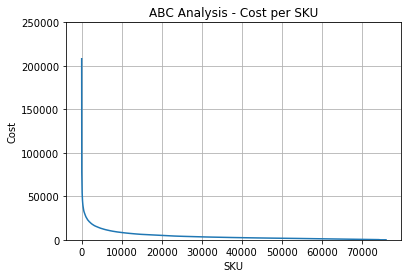

In [43]:
performance = subdata['AddCost'].tolist()
y_pos=np.arange(len(performance))

plt.plot(y_pos,performance)
plt.ylabel('Cost')
plt.xlabel('SKU')
plt.title('ABC Analysis - Cost per SKU')
plt.grid(True)
plt.ylim(0,250000)
plt.show()

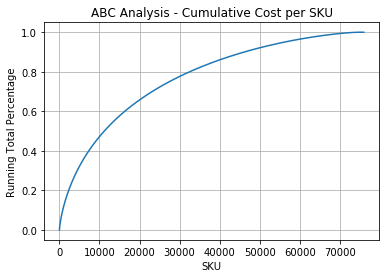

In [45]:
performance=subdata['Runperc'].tolist()
y_pos=np.arange(len(performance))

plt.plot(y_pos,performance)
plt.ylabel('Running Total Percentage')
plt.title('ABC Analysis - Cumulative Cost per SKU')
plt.xlabel('SKU')
plt.grid(True)
plt.show()